In [1]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [2]:
#loading the data
parcels = pd.read_csv('/Users/fayazmoqueem/Desktop/spark project/parcels.csv')


In [3]:
parcels.head()

,objectid,mapc_id,muni_id,muni,parloc_id,poly_typ,map_num,mappar_id,loc_id_cnt,land_value,...,landv_pac,bldgv_psf,totv_pac,bldlnd_rat,sqm_imperv,sqm_bldg,sqm_pave,realesttyp,temp,shape
0,1,1,1,Abington,M_243777_871159,FEE,2,2_5,1.0,100.0,...,3799.689208,-0.999900,3799.689208,0.000000,-0.999900,-0.999900,0.000000,0.0,NaN,3600000004000000080010006A6900001E000000010000...
1,2,2,1,Abington,M_247143_872556,FEE,17,17_23,1.0,196200.0,...,17866.780110,-0.999900,17866.780110,0.000000,-0.999900,-0.999900,0.000000,0.0,NaN,7C00000010000000080010006A690000A4010000010000...
2,3,3,1,Abington,M_247356_872533,FEE,18,18_5,1.0,149700.0,...,176835.192910,76.089109,544090.112587,2.076820,31.810949,13.312941,18.498008,0.0,NaN,7900000010000000080010006A690000A1010000010000...
3,4,4,1,Abington,M_245225_872369,FEE,15,15_103,1.0,164700.0,...,231127.015524,70.778509,593464.571130,1.567699,0.094107,-0.999900,0.000000,0.0,NaN,740000000F000000080010006A6900009C010000010000...
4,5,5,1,Abington,M_245207_872336,FEE,15,15_102,1.0,167500.0,...,237263.406756,52.696986,523962.591995,1.208358,301.967059,182.962820,119.004239,1.0,NaN,690000000D000000080010006A69000091010000010000...


In [4]:
parcels.dtypes

objectid         int64
mapc_id          int64
muni_id          int64
muni            object
parloc_id       object
poly_typ        object
map_num         object
mappar_id       object
loc_id_cnt     float64
land_value     float64
bldg_value     float64
othr_value     float64
total_value    float64
ls_price       float64
ls_date         object
bldg_area      float64
res_area       float64
luc_1           object
luc_2           object
luc_adj_1      float64
luc_adj_2      float64
num_units      float64
units_est      float64
units_src       object
num_rooms      float64
yr_built       float64
site_addr       object
addr_str        object
addr_num        object
addr_zip        object
owner_name      object
owner_addr      object
owner_city      object
owner_stat      object
owner_zip       object
fy             float64
lot_areaft     float64
far            float64
pct_imperv     float64
pct_bldg       float64
pct_pave       float64
landv_pac      float64
bldgv_psf      float64
totv_pac   

In [5]:
parcels.columns

Index(['objectid', 'mapc_id', 'muni_id', 'muni', 'parloc_id', 'poly_typ',
       'map_num', 'mappar_id', 'loc_id_cnt', 'land_value', 'bldg_value',
       'othr_value', 'total_value', 'ls_price', 'ls_date', 'bldg_area',
       'res_area', 'luc_1', 'luc_2', 'luc_adj_1', 'luc_adj_2', 'num_units',
       'units_est', 'units_src', 'num_rooms', 'yr_built', 'site_addr',
       'addr_str', 'addr_num', 'addr_zip', 'owner_name', 'owner_addr',
       'owner_city', 'owner_stat', 'owner_zip', 'fy', 'lot_areaft', 'far',
       'pct_imperv', 'pct_bldg', 'pct_pave', 'landv_pac', 'bldgv_psf',
       'totv_pac', 'bldlnd_rat', 'sqm_imperv', 'sqm_bldg', 'sqm_pave',
       'realesttyp', 'temp', 'shape'],
      dtype='object')

In [6]:
#loading 311 data
df_311 = pd.read_csv('/Users/fayazmoqueem/Desktop/spark project/311_2.csv')

In [7]:
# dropping 'Unnamed:0'
df_311.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
df_311.head(4)

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101001685765,2016-01-01 14:10:00,2016-01-31 14:10:08,2016-04-21 10:44:42,OVERDUE,Closed,Case Closed. Closed date : 2016-04-21 10:44:42...,Heat - Excessive Insufficient,Inspectional Services,Housing,...,A7,East Boston,1,Ward 1,0104,92 Chelsea St,2128.0,42.3723,-71.0363,Constituent Call
1,101001685785,2016-01-01 15:31:00,2016-01-31 15:31:59,2016-01-04 11:50:08,ONTIME,Closed,Case Closed. Closed date : 2016-01-04 11:50:08...,Trash on Vacant Lot,Inspectional Services,Environmental Services,...,C11,Dorchester,8,Ward 15,1504,9 Downer Ct,2125.0,42.3594,-71.0587,Self Service
2,101001685806,2016-01-01 17:21:00,2016-04-30 17:21:33,NaN,OVERDUE,Open,,Bed Bugs,Inspectional Services,Housing,...,A1,Boston,4,03,0308,55 Summer St,2111.0,42.3543,-71.0592,Self Service
3,101001685828,2016-01-01 19:15:00,2016-01-11 08:30:00,2017-05-26 10:40:54,OVERDUE,Closed,Case Closed. Closed date : 2017-05-26 10:40:54...,Electrical,Inspectional Services,Building,...,A1,Downtown / Financial District,3,Ward 3,0306,88 Broad St,2110.0,42.3575,-71.0524,Constituent Call


In [9]:
df_311.shape

(386136, 29)

In [10]:
#changing the 'location_street_name' to string type
df_311['location_street_name'] = df_311['location_street_name'].astype(str)

In [11]:
#converting to uppercase letters
df_311['location_street_name'] = df_311['location_street_name'].apply(lambda x: x.upper())

In [12]:
print(parcels.columns)
print(df_311.columns)

Index(['objectid', 'mapc_id', 'muni_id', 'muni', 'parloc_id', 'poly_typ',
       'map_num', 'mappar_id', 'loc_id_cnt', 'land_value', 'bldg_value',
       'othr_value', 'total_value', 'ls_price', 'ls_date', 'bldg_area',
       'res_area', 'luc_1', 'luc_2', 'luc_adj_1', 'luc_adj_2', 'num_units',
       'units_est', 'units_src', 'num_rooms', 'yr_built', 'site_addr',
       'addr_str', 'addr_num', 'addr_zip', 'owner_name', 'owner_addr',
       'owner_city', 'owner_stat', 'owner_zip', 'fy', 'lot_areaft', 'far',
       'pct_imperv', 'pct_bldg', 'pct_pave', 'landv_pac', 'bldgv_psf',
       'totv_pac', 'bldlnd_rat', 'sqm_imperv', 'sqm_bldg', 'sqm_pave',
       'realesttyp', 'temp', 'shape'],
      dtype='object')
Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_

In [13]:
#dropping unnecessary columns
parcels.drop(['mapc_id', 'muni_id' ,'muni', 'parloc_id', 'poly_typ',
              'map_num', 'mappar_id', 'loc_id_cnt', 'land_value', 'bldg_value','othr_value','sqm_imperv',
              'sqm_bldg', 'sqm_pave','realesttyp', 'temp', 'shape', 'units_src', 'num_rooms', 'fy', 'lot_areaft', 'far', 
              'pct_imperv', 'pct_bldg', 'pct_pave', 'landv_pac', 'bldgv_psf','totv_pac', 'bldlnd_rat',
              'addr_str', 'addr_num', 'owner_stat', 'addr_zip', 'num_units', 'units_est', 'luc_1', 'luc_2'
              , 'luc_adj_1', 'luc_adj_2', 'objectid'], axis = 1, inplace = True)

In [14]:
# converting ls_date to str type
parcels['ls_date'] = parcels['ls_date'].astype(str)

In [15]:
# restructured ls_date, previously it was in integer form 
parcels['ls_date'] = parcels['ls_date'].apply(lambda x: (x[:4] + '/' + x[4:6] + '/' + x[6:9]))

In [16]:
parcels.head(4)

,total_value,ls_price,ls_date,bldg_area,res_area,yr_built,site_addr,owner_name,owner_addr,owner_city,owner_zip
0,100.0,47900.0,1980/09/22.,0.0,0.0,0.0,0 WILBUR ST,HATCH ROBERT B & SMITH CHERYL,76 WILBUR STREET,ABINGTON,02351
1,196200.0,325000.0,2015/07/10.,0.0,0.0,0.0,0 PLYMOUTH ST,ABINGTON INVESTMENTS LLC,245 CENTRAL ST,ABINGTON,02351
2,460600.0,485000.0,2016/12/19.,4040.0,2072.0,2016.0,1019 PLYMOUTH ST,REEVES MATTHEW,1019 PLYMOUTH ST,ABINGTON,02351
3,422900.0,429000.0,2014/11/21.,3648.0,2016.0,2014.0,93 ASHLAND ST,WATTERS JONATHAN M,93 ASHLAND,ABINGTON,02351


In [17]:
df_311.head(4)

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101001685765,2016-01-01 14:10:00,2016-01-31 14:10:08,2016-04-21 10:44:42,OVERDUE,Closed,Case Closed. Closed date : 2016-04-21 10:44:42...,Heat - Excessive Insufficient,Inspectional Services,Housing,...,A7,East Boston,1,Ward 1,0104,92 CHELSEA ST,2128.0,42.3723,-71.0363,Constituent Call
1,101001685785,2016-01-01 15:31:00,2016-01-31 15:31:59,2016-01-04 11:50:08,ONTIME,Closed,Case Closed. Closed date : 2016-01-04 11:50:08...,Trash on Vacant Lot,Inspectional Services,Environmental Services,...,C11,Dorchester,8,Ward 15,1504,9 DOWNER CT,2125.0,42.3594,-71.0587,Self Service
2,101001685806,2016-01-01 17:21:00,2016-04-30 17:21:33,NaN,OVERDUE,Open,,Bed Bugs,Inspectional Services,Housing,...,A1,Boston,4,03,0308,55 SUMMER ST,2111.0,42.3543,-71.0592,Self Service
3,101001685828,2016-01-01 19:15:00,2016-01-11 08:30:00,2017-05-26 10:40:54,OVERDUE,Closed,Case Closed. Closed date : 2017-05-26 10:40:54...,Electrical,Inspectional Services,Building,...,A1,Downtown / Financial District,3,Ward 3,0306,88 BROAD ST,2110.0,42.3575,-71.0524,Constituent Call


In [18]:
#saved the cleaned parcels into a csv file
#parcels.to_csv('parcel_new.csv')

In [19]:
parcels.isnull().sum()

total_value        0
ls_price           0
ls_date            0
bldg_area          0
res_area           0
yr_built       40998
site_addr      11661
owner_name     11511
owner_addr     12880
owner_city     12860
owner_zip      15140
dtype: int64

In [20]:
parcels.shape

(1274945, 11)

In [21]:
# removing the rows having NaN values, we have enough data so its better dropping the NaN rows as we cant replace the zip codes
import numpy as np
parcels = parcels[~parcels['owner_zip'].isin([np.NaN])]
parcels = parcels[~parcels['owner_city'].isin([np.NaN])]
parcels = parcels[~parcels['owner_addr'].isin([np.NaN])]
parcels = parcels[~parcels['owner_name'].isin([np.NaN])]
parcels = parcels[~parcels['site_addr'].isin([np.NaN])]
parcels = parcels[~parcels['yr_built'].isin([np.NaN])]

In [22]:
parcels.head(4)

,total_value,ls_price,ls_date,bldg_area,res_area,yr_built,site_addr,owner_name,owner_addr,owner_city,owner_zip
0,100.0,47900.0,1980/09/22.,0.0,0.0,0.0,0 WILBUR ST,HATCH ROBERT B & SMITH CHERYL,76 WILBUR STREET,ABINGTON,02351
1,196200.0,325000.0,2015/07/10.,0.0,0.0,0.0,0 PLYMOUTH ST,ABINGTON INVESTMENTS LLC,245 CENTRAL ST,ABINGTON,02351
2,460600.0,485000.0,2016/12/19.,4040.0,2072.0,2016.0,1019 PLYMOUTH ST,REEVES MATTHEW,1019 PLYMOUTH ST,ABINGTON,02351
3,422900.0,429000.0,2014/11/21.,3648.0,2016.0,2014.0,93 ASHLAND ST,WATTERS JONATHAN M,93 ASHLAND,ABINGTON,02351


In [23]:
print(parcels.columns)
print(df_311.columns)

Index(['total_value', 'ls_price', 'ls_date', 'bldg_area', 'res_area',
       'yr_built', 'site_addr', 'owner_name', 'owner_addr', 'owner_city',
       'owner_zip'],
      dtype='object')
Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'source'],
      dtype='object')


In [24]:
# renaming the 'site_addr column' to 'address' so that we can merge addresses under single column
parcels = parcels.rename(columns={'site_addr': 'address'})

In [25]:
parcels.shape

(1230804, 11)

In [26]:
# renaming the location_street_name column to address so that we can merge addresses under single column
df_311 = df_311.rename(columns={'location_street_name': 'address'})

In [27]:
df_311.shape

(386136, 29)

In [28]:
# merging df_311, parcels on address (innerjoint) 
merged_311 = pd.merge(df_311, parcels, on = 'address', how = 'inner')

In [29]:
merged_311.shape

(357434, 39)

In [30]:
merged_311.head(20)

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,total_value,ls_price,ls_date,bldg_area,res_area,yr_built,owner_name,owner_addr,owner_city,owner_zip
0,101001685765,2016-01-01 14:10:00,2016-01-31 14:10:08,2016-04-21 10:44:42,OVERDUE,Closed,Case Closed. Closed date : 2016-04-21 10:44:42...,Heat - Excessive Insufficient,Inspectional Services,Housing,...,231100.0,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0
1,101001745959,2016-03-14 09:59:00,2016-03-21 09:59:38,2018-05-14 15:44:54,OVERDUE,Closed,Case Closed. Closed date : 2018-05-14 15:44:54...,Illegal Occupancy,Inspectional Services,Building,...,231100.0,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0
2,101002384775,2018-03-03 12:43:00,2018-03-05 12:43:21,NaN,OVERDUE,Open,,Work w/out Permit,Inspectional Services,Building,...,231100.0,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0
3,101002724652,2018-11-10 11:54:00,2018-11-19 08:30:00,2018-11-14 08:53:35,ONTIME,Closed,Case Closed. Closed date : 2018-11-14 08:53:35...,Maintenance - Homeowner,Inspectional Services,Building,...,231100.0,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0
4,101002788418,2019-01-28 09:25:00,2019-01-30 09:25:50,2019-03-12 14:50:38,OVERDUE,Closed,Case Closed. Closed date : 2019-03-12 14:50:38...,Work w/out Permit,Inspectional Services,Building,...,231100.0,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0
5,101003203891,2020-02-27 02:33:00,2020-03-03 08:30:00,2020-03-02 15:08:42,ONTIME,Closed,Case Closed. Closed date : 2020-03-02 15:08:42...,Building Inspection Request,Inspectional Services,Building,...,231100.0,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0
6,101004079574,2021-12-06 09:11:00,2022-04-05 09:11:51,2021-12-06 10:50:58,ONTIME,Closed,Case Closed. Closed date : Mon Dec 06 10:50:58...,Pest Infestation - Residential,Inspectional Services,Housing,...,231100.0,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0
7,101004209180,2022-03-03 19:38:00,2022-03-05 19:38:36,2022-03-04 11:05:56,ONTIME,Closed,Case Closed. Closed date : Fri Mar 04 11:05:56...,Work w/out Permit,Inspectional Services,Building,...,231100.0,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0
8,101001685785,2016-01-01 15:31:00,2016-01-31 15:31:59,2016-01-04 11:50:08,ONTIME,Closed,Case Closed. Closed date : 2016-01-04 11:50:08...,Trash on Vacant Lot,Inspectional Services,Environmental Services,...,153200.0,0.0,nan//,0.0,0.0,0.0,ACEVEDO RAMOND A JR,228 WESTERN AV,CAMBRIDGE,02139
9,101004395647,2022-07-20 10:27:00,2022-07-25 10:27:06,2022-07-20 10:36:37,ONTIME,Closed,Case Closed. Closed date : Wed Jul 20 10:36:37...,Poor Conditions of Property,Public Works Department,Code Enforcement,...,153200.0,0.0,nan//,0.0,0.0,0.0,ACEVEDO RAMOND A JR,228 WESTERN AV,CAMBRIDGE,02139


In [31]:
# dropping submittedphoto, closedphoto due too many null values, and also they aren't required i guess
merged_311.drop(['submittedphoto', 'closedphoto'], axis = 1, inplace = True)

In [32]:
merged_311['violation_type'] = ''



merged_311
conditions = [(merged_311['reason'] == 'Code Enforcement'), # will match to Enforcement Violation
              
              (merged_311['reason'] == 'Noise Disturbance'),
              (merged_311['reason'] == 'Generic Noise Disturbance'), # Will match to Housing violations
              
              (merged_311['reason'] == 'Recycling'),
              (merged_311['reason'] == 'Environmental Services'),# will match to sanitation requests
              
              (merged_311['reason'] == 'Neighborhood Services Issues'),
              (merged_311['reason'] == 'Parking Complaints'), # will match to civic maintanance requests
              
              (merged_311['reason'] == 'Building'), #will match to building violations
              
              (merged_311['reason'] == 'Housing') #will match to housing violations 
             ]

#violation types to be matched with
violation_types = ['Enforcement Violations',
                   
                   'Housing Violations','Housing Violations',
                   
                   'Sanitation Requests','Sanitation Requests',
                   
                   'Civic Maintenance Requests', 'Civic Maintenance Requests',
                   
                   'Building Violations', 
                   
                   'Housing Complaints'
                  ]

merged_311['violation_type'] = np.select(conditions, violation_types)

merged_311 # dataframe with violation_type, owner name, owner address.


,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,ls_price,ls_date,bldg_area,res_area,yr_built,owner_name,owner_addr,owner_city,owner_zip,violation_type
0,101001685765,2016-01-01 14:10:00,2016-01-31 14:10:08,2016-04-21 10:44:42,OVERDUE,Closed,Case Closed. Closed date : 2016-04-21 10:44:42...,Heat - Excessive Insufficient,Inspectional Services,Housing,...,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,Housing Complaints
1,101001745959,2016-03-14 09:59:00,2016-03-21 09:59:38,2018-05-14 15:44:54,OVERDUE,Closed,Case Closed. Closed date : 2018-05-14 15:44:54...,Illegal Occupancy,Inspectional Services,Building,...,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,Building Violations
2,101002384775,2018-03-03 12:43:00,2018-03-05 12:43:21,NaN,OVERDUE,Open,,Work w/out Permit,Inspectional Services,Building,...,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,Building Violations
3,101002724652,2018-11-10 11:54:00,2018-11-19 08:30:00,2018-11-14 08:53:35,ONTIME,Closed,Case Closed. Closed date : 2018-11-14 08:53:35...,Maintenance - Homeowner,Inspectional Services,Building,...,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,Building Violations
4,101002788418,2019-01-28 09:25:00,2019-01-30 09:25:50,2019-03-12 14:50:38,OVERDUE,Closed,Case Closed. Closed date : 2019-03-12 14:50:38...,Work w/out Permit,Inspectional Services,Building,...,0.0,nan//,3928.0,2590.0,1900.0,KMF TRUST,2 WASHINGTON TERRACE,WINTHROP,2152.0,Building Violations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357429,101004533531,2022-10-20 10:55:00,2022-10-27 10:55:10,NaN,OVERDUE,Open,,Maintenance - Homeowner,Inspectional Services,Building,...,0.0,nan//,2990.0,1661.0,1910.0,GRANVILLE CLARENCE V ETAL,39 MASSASOIT,HYDE PARK,2136.0,Building Violations
357430,101004536900,2022-10-24 08:23:00,2022-11-14 08:30:00,NaN,ONTIME,Open,,Request for Recycling Cart,Public Works Department,Recycling,...,0.0,nan//,3509.0,2096.0,1950.0,SHORTSLEEVE ROBERT H,45 LILA RD,JAMAICA PLAIN,2130.0,Sanitation Requests
357431,101004541642,2022-10-27 18:58:01,2022-11-26 18:58:02,2022-10-28 04:41:21,ONTIME,Closed,Case Closed. Closed date : Fri Oct 28 04:41:21...,Rodent Activity,Inspectional Services,Environmental Services,...,200000.0,2012/12/31.,1140.0,1140.0,1940.0,PRECOURT NICHOLAS D,4 NEWBURY STREET,NORTON,02766,Sanitation Requests
357432,101004541642,2022-10-27 18:58:01,2022-11-26 18:58:02,2022-10-28 04:41:21,ONTIME,Closed,Case Closed. Closed date : Fri Oct 28 04:41:21...,Rodent Activity,Inspectional Services,Environmental Services,...,5600000.0,2006/04/04.,32401.0,32269.0,1992.0,"4 NEWBURY DANVERS, LLC",P.O. BOX 412,HEALDSBURG,95448,Sanitation Requests


In [33]:
merged_311.columns

Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'location', 'fire_district',
       'pwd_district', 'city_council_district', 'police_district',
       'neighborhood', 'neighborhood_services_district', 'ward', 'precinct',
       'address', 'location_zipcode', 'latitude', 'longitude', 'source',
       'total_value', 'ls_price', 'ls_date', 'bldg_area', 'res_area',
       'yr_built', 'owner_name', 'owner_addr', 'owner_city', 'owner_zip',
       'violation_type'],
      dtype='object')

In [34]:
#dropping the columns which doesnt seem to be useful
merged_311.drop(['total_value', 'ls_price', 'bldg_area', 'res_area', 'precinct'], axis = 1, inplace = True)

In [35]:
merged_311.shape

(357434, 33)

In [36]:
#merged_311.to_csv("merged_311_parcels_main.csv")

In [37]:
merged_311['yr_built'].value_counts()

1900.0     54935
1910.0     22607
1905.0     22199
1920.0     22140
1890.0     19534
           ...  
1758.0         1
1733.0         1
1695.0         1
17571.0        1
1683.0         1
Name: yr_built, Length: 344, dtype: int64

In [40]:
# min & max before the below operation
print(merged_311['yr_built'].max())
print(merged_311['yr_built'].min())

19841.0
0.0


In [41]:
#removing the years more than 2022.
merged_311 = merged_311.loc[(merged_311['yr_built'] >= 1600) & (merged_311['yr_built'] <= 2022)]

In [42]:
#min & max after.
print(merged_311['yr_built'].max())
print(merged_311['yr_built'].min())

2018.0
1601.0


In [43]:
merged_311['yr_built'].value_counts()

1900.0    54935
1910.0    22607
1905.0    22199
1920.0    22140
1890.0    19534
          ...  
1692.0        1
1781.0        1
1652.0        1
1758.0        1
1695.0        1
Name: yr_built, Length: 323, dtype: int64

In [45]:
#dividing the years in 3 categories :"old", "moderate", "new"
df1 = merged_311.loc[(merged_311['yr_built'] >= 1600) & (merged_311['yr_built'] <= 1900)]
df2 = merged_311.loc[(merged_311['yr_built'] >= 1901) & (merged_311['yr_built'] <= 2000)]
df3 = merged_311.loc[(merged_311['yr_built'] >= 2001) & (merged_311['yr_built'] <= 2018)]

In [46]:
old = df1[['yr_built']]
moderate = df2[['yr_built']]
new = df3[['yr_built']]

In [61]:
print(old['yr_built'].shape)
print(moderate['yr_built'].shape)
print(new['yr_built'].shape)

(135730,)
(197799,)
(10264,)


<AxesSubplot:>

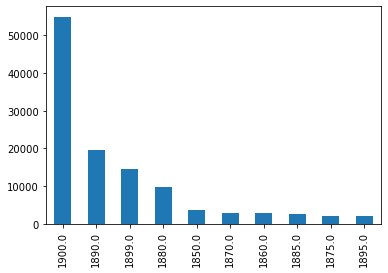

In [57]:
#top 10 years from 1600-1900 with largest violation rate
old['yr_built'].value_counts().nlargest(10).plot(kind='bar')


<AxesSubplot:>

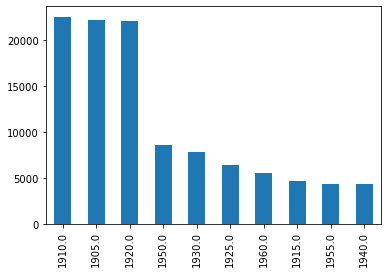

In [51]:
#top 10 years from 1901-2000 with largest violation rate
moderate['yr_built'].value_counts().nlargest(10).plot(kind='bar')

<AxesSubplot:>

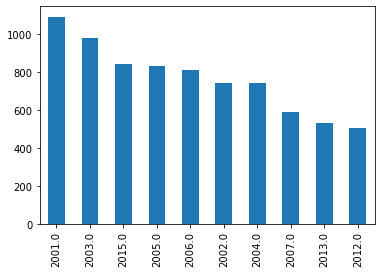

In [52]:
#top 10 years from 2001-2018 with largest violation rate
new['yr_built'].value_counts().nlargest(10).plot(kind='bar')

### Q) Do older buildings lead to more violations?

A) There is no consistent trend in the rise in violations based on year built. The 'Old' properties established between 1600-1900 are having less violations when compared to 'Moderate' properties which were established between 1901-2000. However, properties built in 1900 have the highest violations. Properties that were built between 1901-2000(Moderate) have the most violations.